## Tal Boger, Dribble Analytics

## master-wingspan-height-defense.ipynb

## https://dribbleanalytics.blogspot.com/2018/04/is-wingspan-or-height-better-predictor.html

## github.com/dribbleanalytics/wingspan-height-defense/

# DWS graphs with linear trendline

Wingspan and DWS: slope = 0.059233437872150387 , intercept = -3.7707133282722647 , r_value = 0.21782401213408065 , p_value = 3.1953310843431614e-07 , std_err = 0.011442332264342835
Height and DWS: slope = 0.041183260652976846 , intercept = -2.1044580046004313 , r_value = 0.1303056971224392 , p_value = 0.0024136709605384527 , std_err = 0.013509754516619722


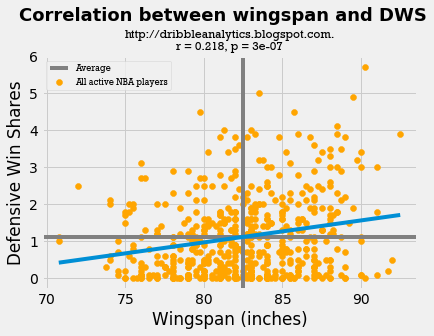

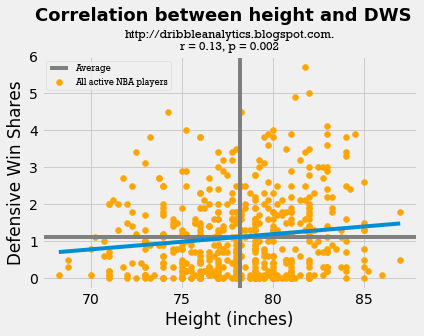

In [1]:
%matplotlib inline

import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import csv
from scipy.optimize import curve_fit

# Replace what is inside the quotes with wherever you placed the file
with open(r'C:\Users\tboge\OneDrive\dribble-analytics\wingspan-height-drtg\final-player-data-all.csv') as csvfile:
    readCSVplayer = csv.reader(csvfile, delimiter = ',')
    next(readCSVplayer)
    player = []
    wingspan = []
    height = []
    dws = []
 
    for row in readCSVplayer:
        currPlayer = row[0]
        currWingspan = row[1]
        currHeight = row[2]
        currDWS = row[3]

        player.append(currPlayer)
        wingspan.append(currWingspan)
        height.append(currHeight)
        dws.append(currDWS)
        
floatWingspan = [float(i) for i in wingspan]
floatHeight = [float(i) for i in height]
floatDWS = [float(i) for i in dws]

plt.style.use('fivethirtyeight')
 
wingspanPlotDWS, ax = plt.subplots()
heightPlotDWS, ax2 = plt.subplots()

ax.scatter(floatWingspan, floatDWS, label = "All active NBA players", color = 'orange')
ax.axvline(x = np.mean(floatWingspan), color = 'grey')
ax.axhline(y = np.mean(floatDWS), label = "Average", color = 'grey')
wingspanPlotDWS.suptitle("Correlation between wingspan and DWS", weight = 'bold', size = 18, y = 1.05)
ax.set_title("Created by Tal Boger, http://dribbleanalytics.blogspot.com.", size = 11, fontname = 'Rockwell')
ax.set_xlabel("Wingspan (inches)")
ax.set_ylabel("Defensive Win Shares")
 
ax.plot(np.unique(floatWingspan), np.poly1d(np.polyfit(floatWingspan, floatDWS, 1))(np.unique(floatWingspan)))
 
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(floatWingspan, floatDWS)
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 7))
 
ax.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')
 
ax2.scatter(floatHeight, floatDWS, label = "All active NBA players", color = 'orange')
ax2.axvline(x = np.mean(floatHeight), color = 'grey')
ax2.axhline(y = np.mean(floatDWS), label = "Average", color = 'grey')
heightPlotDWS.suptitle("Correlation between height and DWS", weight = 'bold', size = 18, y = 1.05)
ax2.set_title("Created by Tal Boger, http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax2.set_xlabel("Height (inches)")
ax2.set_ylabel("Defensive Win Shares") 

ax2.plot(np.unique(floatHeight), np.poly1d(np.polyfit(floatHeight, floatDWS, 1))(np.unique(floatHeight)))
 
ax2.legend(loc='best', prop={'size': 9, 'family': 'Rockwell'})

slope, intercept, r_value, p_value, std_err = linregress(floatHeight, floatDWS)
print("Height and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3))
 
ax2.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')

# Remove if you do not want to save the figures in your working directory
# Change the DPI to adjust image size
wingspanPlotDWS.savefig('wingspan-dws-linear.png', dpi = 400, bbox_inches = 'tight')
heightPlotDWS.savefig('height-dws-linear.png', dpi = 400, bbox_inches = 'tight')

# DWS graphs with exponential trendline

Wingspan and DWS: slope = 0.059233437872150387 , intercept = -3.7707133282722647 , r_value = 0.21782401213408065 , p_value = 3.1953310843431614e-07 , std_err = 0.011442332264342835
Height and DWS: slope = 0.041183260652976846 , intercept = -2.1044580046004313 , r_value = 0.1303056971224392 , p_value = 0.0024136709605384527 , std_err = 0.013509754516619722


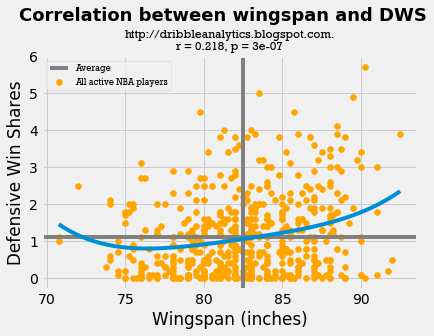

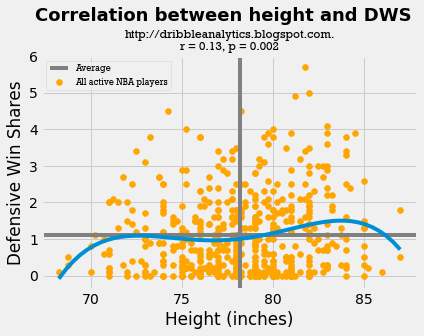

In [2]:
plt.style.use('fivethirtyeight')

wingspanPlotDWS, ax = plt.subplots()
heightPlotDWS, ax2 = plt.subplots()

ax.scatter(floatWingspan, floatDWS, label = "All active NBA players", color = 'orange')
ax.axvline(x = np.mean(floatWingspan), color = 'grey')
ax.axhline(y = np.mean(floatDWS), label = "Average", color = 'grey')
wingspanPlotDWS.suptitle("Correlation between wingspan and DWS", weight = 'bold', size = 18, y = 1.05)
ax.set_title("Created by Tal Boger, http://dribbleanalytics.blogspot.com.", size = 11, fontname = 'Rockwell')
ax.set_xlabel("Wingspan (inches)")
ax.set_ylabel("Defensive Win Shares")
 
z = np.polyfit(floatWingspan, floatDWS, 4)
f = np.poly1d(z)
 
x_new = np.linspace(min(floatWingspan), max(floatWingspan), 50)
y_new = f(x_new)
ax.plot(x_new, y_new)

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(floatWingspan, floatDWS)
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 7))
 
ax.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')
 
ax2.scatter(floatHeight, floatDWS, label = "All active NBA players", color = 'orange')
ax2.axvline(x = np.mean(floatHeight), color = 'grey')
ax2.axhline(y = np.mean(floatDWS), label = "Average", color = 'grey')
heightPlotDWS.suptitle("Correlation between height and DWS", weight = 'bold', size = 18, y = 1.05)
ax2.set_title("Created by Tal Boger, http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax2.set_xlabel("Height (inches)")
ax2.set_ylabel("Defensive Win Shares")

 
z = np.polyfit(floatHeight, floatDWS, 4)
f = np.poly1d(z)

x_new = np.linspace(min(floatHeight), max(floatHeight), 50)
y_new = f(x_new)
ax2.plot(x_new, y_new)
 
ax2.legend(loc='best', prop={'size': 9, 'family': 'Rockwell'})

slope, intercept, r_value, p_value, std_err = linregress(floatHeight, floatDWS)
print("Height and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3))
 
ax2.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')
 
# Remove if you do not want to save the figures in your working directory
# Change the DPI to adjust image size
wingspanPlotDWS.savefig('wingspan-dws-exponential.png', dpi = 400, bbox_inches = 'tight')
heightPlotDWS.savefig('height-dws-exponential.png', dpi = 400, bbox_inches = 'tight')

# DWS guard graphs with linear trendline

Wingspan and DWS: slope = 0.03672520062758392 , intercept = -1.9613768818775414 , r_value = 0.10590272132931067 , p_value = 0.1016977545150208 , std_err = 0.022352156434980022
Height and DWS: slope = 0.004195911031967086 , intercept = 0.6365566407741949 , r_value = 0.010005747104551828 , p_value = 0.8774497156717567 , std_err = 0.027181068801518996


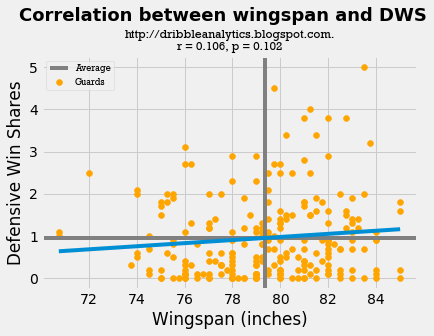

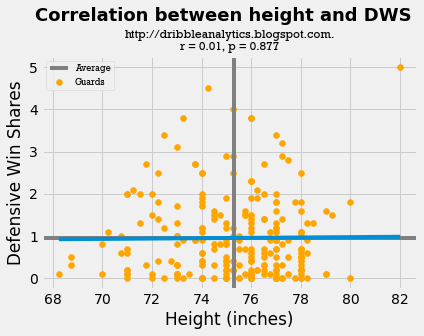

In [3]:
# Replace what is inside the quotes with wherever you placed the file
with open(r'C:\Users\tboge\OneDrive\dribble-analytics\wingspan-height-drtg\final-player-data-guards.csv') as csvfile:
    readCSVguard = csv.reader(csvfile, delimiter = ',')
    next(readCSVguard)
    player = []
    wingspan = []
    height = []
    dws = []
 
    for row in readCSVguard:
        currPlayer = row[0]
        currWingspan = row[1]
        currHeight = row[2]
        currDWS = row[3]

        player.append(currPlayer)
        wingspan.append(currWingspan)
        height.append(currHeight)
        dws.append(currDWS)
        
floatWingspan = [float(i) for i in wingspan]
floatHeight = [float(i) for i in height]
floatDWS = [float(i) for i in dws]

plt.style.use('fivethirtyeight')
 
wingspanPlotDWSguards, ax = plt.subplots()
heightPlotDWSguards, ax2 = plt.subplots()

ax.scatter(floatWingspan, floatDWS, label = 'Guards', color = 'orange')
ax.axvline(x = np.mean(floatWingspan), color = 'grey')
ax.axhline(y = np.mean(floatDWS), label = "Average", color = 'grey')
wingspanPlotDWSguards.suptitle("Correlation between wingspan and DWS", weight = 'bold', size = 18, y = 1.05)
ax.set_title("Created by Tal Boger, http://dribbleanalytics.blogspot.com.", size = 11, fontname = 'Rockwell')
ax.set_xlabel("Wingspan (inches)")
ax.set_ylabel("Defensive Win Shares")
 
ax.plot(np.unique(floatWingspan), np.poly1d(np.polyfit(floatWingspan, floatDWS, 1))(np.unique(floatWingspan)))
 
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(floatWingspan, floatDWS)
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3))
 
ax.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')
 
ax2.scatter(floatHeight, floatDWS, label = 'Guards', color = 'orange')
ax2.axvline(x = np.mean(floatHeight), color = 'grey')
ax2.axhline(y = np.mean(floatDWS), label = "Average", color = 'grey')
heightPlotDWSguards.suptitle("Correlation between height and DWS", weight = 'bold', size = 18, y = 1.05)
ax2.set_title("Created by Tal Boger, http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax2.set_xlabel("Height (inches)")
ax2.set_ylabel("Defensive Win Shares") 

ax2.plot(np.unique(floatHeight), np.poly1d(np.polyfit(floatHeight, floatDWS, 1))(np.unique(floatHeight)))
 
ax2.legend(loc='best', prop={'size': 9, 'family': 'Rockwell'})

slope, intercept, r_value, p_value, std_err = linregress(floatHeight, floatDWS)
print("Height and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3))
 
ax2.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')

# Remove if you do not want to save the figures in your working directory
# Change the DPI to adjust image size
wingspanPlotDWSguards.savefig('wingspan-dws-linear-guards.png', dpi = 400, bbox_inches = 'tight')
heightPlotDWSguards.savefig('height-dws-linear-guards.png', dpi = 400, bbox_inches = 'tight')

# DWS guards with exponential trendline

Wingspan and DWS: slope = 0.03672520062758392 , intercept = -1.9613768818775414 , r_value = 0.10590272132931067 , p_value = 0.1016977545150208 , std_err = 0.022352156434980022
Height and DWS: slope = 0.004195911031967086 , intercept = 0.6365566407741949 , r_value = 0.010005747104551828 , p_value = 0.8774497156717567 , std_err = 0.027181068801518996


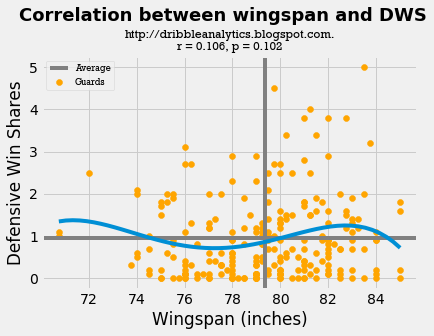

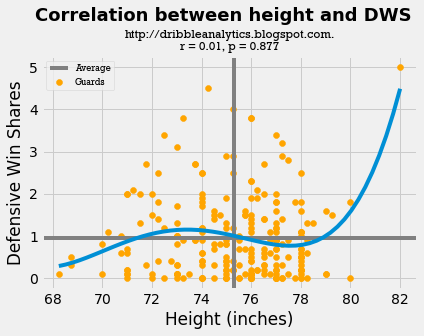

In [4]:
plt.style.use('fivethirtyeight')

wingspanPlotDWSguards, ax = plt.subplots()
heightPlotDWSguards, ax2 = plt.subplots()

ax.scatter(floatWingspan, floatDWS, label = 'Guards', color = 'orange')
ax.axvline(x = np.mean(floatWingspan), color = 'grey')
ax.axhline(y = np.mean(floatDWS), label = "Average", color = 'grey')
wingspanPlotDWSguards.suptitle("Correlation between wingspan and DWS", weight = 'bold', size = 18, y = 1.05)
ax.set_title("Created by Tal Boger, http://dribbleanalytics.blogspot.com.", size = 11, fontname = 'Rockwell')
ax.set_xlabel("Wingspan (inches)")
ax.set_ylabel("Defensive Win Shares")
 
z = np.polyfit(floatWingspan, floatDWS, 4)
f = np.poly1d(z)
 
x_new = np.linspace(min(floatWingspan), max(floatWingspan), 50)
y_new = f(x_new)
ax.plot(x_new, y_new)

ax.legend(loc='best', prop={'size': 9, 'family': 'Rockwell'})
 
slope, intercept, r_value, p_value, std_err = linregress(floatWingspan, floatDWS)
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3))
 
ax.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')
 
ax2.scatter(floatHeight, floatDWS, label = 'Guards', color = 'orange')
ax2.axvline(x = np.mean(floatHeight), color = 'grey')
ax2.axhline(y = np.mean(floatDWS), label = "Average", color = 'grey')
heightPlotDWSguards.suptitle("Correlation between height and DWS", weight = 'bold', size = 18, y = 1.05)
ax2.set_title("Created by Tal Boger, http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax2.set_xlabel("Height (inches)")
ax2.set_ylabel("Defensive Win Shares")

 
z = np.polyfit(floatHeight, floatDWS, 4)
f = np.poly1d(z)

x_new = np.linspace(min(floatHeight), max(floatHeight), 50)
y_new = f(x_new)
ax2.plot(x_new, y_new)
 
ax2.legend(loc='best', prop={'size': 9, 'family': 'Rockwell'})

slope, intercept, r_value, p_value, std_err = linregress(floatHeight, floatDWS)
print("Height and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3))
 
ax2.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')
 
# Remove if you do not want to save the figures in your working directory
# Change the DPI to adjust image size
wingspanPlotDWSguards.savefig('wingspan-dws-exponential-guards.png', dpi = 400, bbox_inches = 'tight')
heightPlotDWSguards.savefig('height-dws-exponential-guards.png', dpi = 400, bbox_inches = 'tight')

# DWS forwards with linear trendline

Wingspan and DWS: slope = 0.06031836844269485 , intercept = -3.9515927618448377 , r_value = 0.1322451902397261 , p_value = 0.065338748400907 , std_err = 0.03254316607924951
Height and DWS: slope = -0.023079138970307632 , intercept = 2.95126112955535 , r_value = -0.03580721857365654 , p_value = 0.6192135503939521 , std_err = 0.04636516023346652


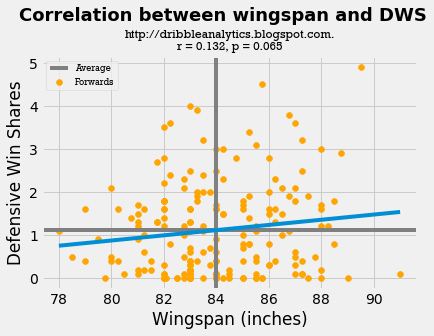

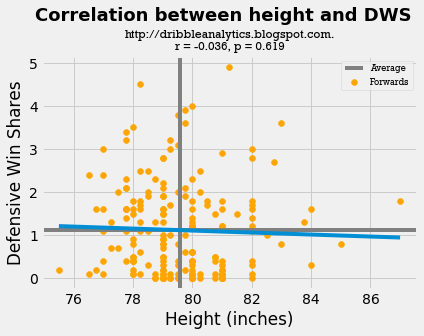

In [5]:
# Replace what is inside the quotes with wherever you placed the file
with open(r'C:\Users\tboge\OneDrive\dribble-analytics\wingspan-height-drtg\final-player-data-forwards.csv') as csvfile:
    readCSVforward = csv.reader(csvfile, delimiter = ',')
    next(readCSVforward)
    player = []
    wingspan = []
    height = []
    dws = []
 
    for row in readCSVforward:
        currPlayer = row[0]
        currWingspan = row[1]
        currHeight = row[2]
        currDWS = row[3]

        player.append(currPlayer)
        wingspan.append(currWingspan)
        height.append(currHeight)
        dws.append(currDWS)
        
floatWingspan = [float(i) for i in wingspan]
floatHeight = [float(i) for i in height]
floatDWS = [float(i) for i in dws]

plt.style.use('fivethirtyeight')
 
wingspanPlotDWSforwards, ax = plt.subplots()
heightPlotDWSforwards, ax2 = plt.subplots()

ax.scatter(floatWingspan, floatDWS, label = 'Forwards', color = 'orange')
ax.axvline(x = np.mean(floatWingspan), color = 'grey')
ax.axhline(y = np.mean(floatDWS), label = "Average", color = 'grey')
wingspanPlotDWSforwards.suptitle("Correlation between wingspan and DWS", weight = 'bold', size = 18, y = 1.05)
ax.set_title("Created by Tal Boger, http://dribbleanalytics.blogspot.com.", size = 11, fontname = 'Rockwell')
ax.set_xlabel("Wingspan (inches)")
ax.set_ylabel("Defensive Win Shares")
 
ax.plot(np.unique(floatWingspan), np.poly1d(np.polyfit(floatWingspan, floatDWS, 1))(np.unique(floatWingspan)))
 
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(floatWingspan, floatDWS)
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3))
 
ax.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')
 
ax2.scatter(floatHeight, floatDWS, label = 'Forwards', color = 'orange')
ax2.axvline(x = np.mean(floatHeight), color = 'grey')
ax2.axhline(y = np.mean(floatDWS), label = "Average", color = 'grey')
heightPlotDWSforwards.suptitle("Correlation between height and DWS", weight = 'bold', size = 18, y = 1.05)
ax2.set_title("Created by Tal Boger, http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax2.set_xlabel("Height (inches)")
ax2.set_ylabel("Defensive Win Shares") 

ax2.plot(np.unique(floatHeight), np.poly1d(np.polyfit(floatHeight, floatDWS, 1))(np.unique(floatHeight)))
 
ax2.legend(loc='best', prop={'size': 9, 'family': 'Rockwell'})

slope, intercept, r_value, p_value, std_err = linregress(floatHeight, floatDWS)
print("Height and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3))
 
ax2.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')

# Remove if you do not want to save the figures in your working directory
# Change the DPI to adjust image size
wingspanPlotDWSforwards.savefig('wingspan-dws-linear-forwards.png', dpi = 400, bbox_inches = 'tight')
heightPlotDWSforwards.savefig('height-dws-linear-forwards.png', dpi = 400, bbox_inches = 'tight')

# DWS forwards with exponential trendline 

Wingspan and DWS: slope = 0.06031836844269485 , intercept = -3.9515927618448377 , r_value = 0.1322451902397261 , p_value = 0.065338748400907 , std_err = 0.03254316607924951
Height and DWS: slope = -0.023079138970307632 , intercept = 2.95126112955535 , r_value = -0.03580721857365654 , p_value = 0.6192135503939521 , std_err = 0.04636516023346652


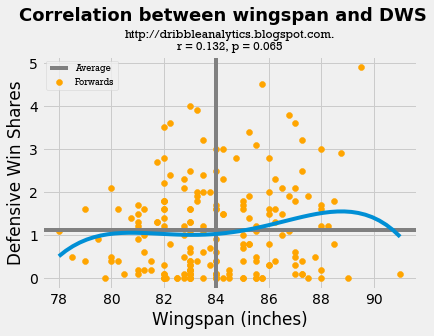

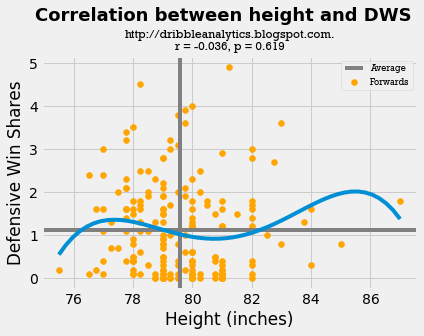

In [6]:
plt.style.use('fivethirtyeight')

wingspanPlotDWSforwards, ax = plt.subplots()
heightPlotDWSforwards, ax2 = plt.subplots()

ax.scatter(floatWingspan, floatDWS, label = 'Forwards', color = 'orange')
ax.axvline(x = np.mean(floatWingspan), color = 'grey')
ax.axhline(y = np.mean(floatDWS), label = "Average", color = 'grey')
wingspanPlotDWSforwards.suptitle("Correlation between wingspan and DWS", weight = 'bold', size = 18, y = 1.05)
ax.set_title("Created by Tal Boger, http://dribbleanalytics.blogspot.com.", size = 11, fontname = 'Rockwell')
ax.set_xlabel("Wingspan (inches)")
ax.set_ylabel("Defensive Win Shares")
 
z = np.polyfit(floatWingspan, floatDWS, 4)
f = np.poly1d(z)
 
x_new = np.linspace(min(floatWingspan), max(floatWingspan), 50)
y_new = f(x_new)
ax.plot(x_new, y_new)

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(floatWingspan, floatDWS)
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3))
 
ax.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')
 
ax2.scatter(floatHeight, floatDWS, label = 'Forwards', color = 'orange')
ax2.axvline(x = np.mean(floatHeight), color = 'grey')
ax2.axhline(y = np.mean(floatDWS), label = "Average", color = 'grey')
heightPlotDWSforwards.suptitle("Correlation between height and DWS", weight = 'bold', size = 18, y = 1.05)
ax2.set_title("Created by Tal Boger, http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax2.set_xlabel("Height (inches)")
ax2.set_ylabel("Defensive Win Shares")
 
z = np.polyfit(floatHeight, floatDWS, 4)
f = np.poly1d(z)

x_new = np.linspace(min(floatHeight), max(floatHeight), 50)
y_new = f(x_new)
ax2.plot(x_new, y_new)
 
ax2.legend(loc='best', prop={'size': 9, 'family': 'Rockwell'})
slope, intercept, r_value, p_value, std_err = linregress(floatHeight, floatDWS)
print("Height and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3))
 
ax2.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')
 
# Remove if you do not want to save the figures in your working directory
# Change the DPI to adjust image size
wingspanPlotDWSforwards.savefig('wingspan-dws-exponential-forwards.png', dpi = 400, bbox_inches = 'tight')
heightPlotDWSforwards.savefig('height-dws-exponential-forwards.png', dpi = 400, bbox_inches = 'tight')

# DWS centers with linear trendline

Wingspan and DWS: slope = 0.1138123399149212 , intercept = -8.40306003969804 , r_value = 0.2202729018476257 , p_value = 0.023950923549267224 , std_err = 0.049660314333473655
Height and DWS: slope = -0.0443164991376757 , intercept = 5.139417800463388 , r_value = -0.05876169840616418 , p_value = 0.5515525154863028 , std_err = 0.07418248880797447


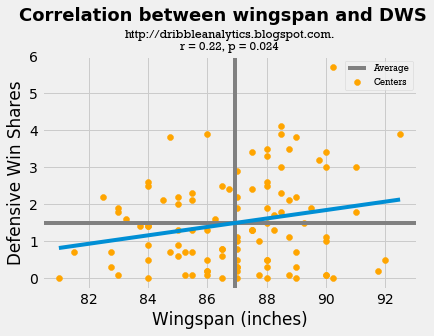

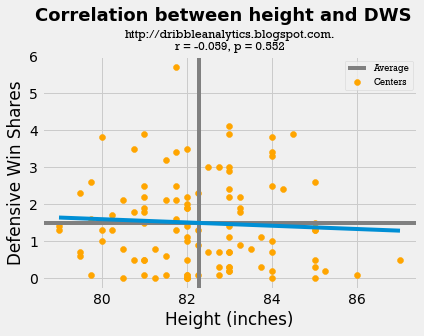

In [7]:
# Replace what is inside the quotes with wherever you placed the file
with open(r'C:\Users\tboge\OneDrive\dribble-analytics\wingspan-height-drtg\final-player-data-centers.csv') as csvfile:
    readCSVcenter = csv.reader(csvfile, delimiter = ',')
    next(readCSVcenter)
    player = []
    wingspan = []
    height = []
    dws = []
 
    for row in readCSVcenter:
        currPlayer = row[0]
        currWingspan = row[1]
        currHeight = row[2]
        currDWS = row[3]

        player.append(currPlayer)
        wingspan.append(currWingspan)
        height.append(currHeight)
        dws.append(currDWS)
        
floatWingspan = [float(i) for i in wingspan]
floatHeight = [float(i) for i in height]
floatDWS = [float(i) for i in dws]

plt.style.use('fivethirtyeight')
 
wingspanPlotDWScenters, ax = plt.subplots()
heightPlotDWScenters, ax2 = plt.subplots()

ax.scatter(floatWingspan, floatDWS, label = 'Centers', color = 'orange')
ax.axvline(x = np.mean(floatWingspan), color = 'grey')
ax.axhline(y = np.mean(floatDWS), label = "Average", color = 'grey')
wingspanPlotDWScenters.suptitle("Correlation between wingspan and DWS", weight = 'bold', size = 18, y = 1.05)
ax.set_title("Created by Tal Boger, http://dribbleanalytics.blogspot.com.", size = 11, fontname = 'Rockwell')
ax.set_xlabel("Wingspan (inches)")
ax.set_ylabel("Defensive Win Shares")
 
ax.plot(np.unique(floatWingspan), np.poly1d(np.polyfit(floatWingspan, floatDWS, 1))(np.unique(floatWingspan)))
 
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(floatWingspan, floatDWS)
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3))
 
ax.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')
 
ax2.scatter(floatHeight, floatDWS, label = 'Centers', color = 'orange')
ax2.axvline(x = np.mean(floatHeight), color = 'grey')
ax2.axhline(y = np.mean(floatDWS), label = "Average", color = 'grey')
heightPlotDWScenters.suptitle("Correlation between height and DWS", weight = 'bold', size = 18, y = 1.05)
ax2.set_title("Created by Tal Boger, http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax2.set_xlabel("Height (inches)")
ax2.set_ylabel("Defensive Win Shares") 

ax2.plot(np.unique(floatHeight), np.poly1d(np.polyfit(floatHeight, floatDWS, 1))(np.unique(floatHeight)))
 
ax2.legend(loc='best', prop={'size': 9, 'family': 'Rockwell'})

slope, intercept, r_value, p_value, std_err = linregress(floatHeight, floatDWS)
print("Height and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3))
 
ax2.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')

# Remove if you do not want to save the figures in your working directory
# Change the DPI to adjust image size
wingspanPlotDWScenters.savefig('wingspan-dws-linear-centers.png', dpi = 400, bbox_inches = 'tight')
heightPlotDWScenters.savefig('height-dws-linear-centers.png', dpi = 400, bbox_inches = 'tight')

# DWS centers with exponential trendline 

Wingspan and DWS: slope = 0.1138123399149212 , intercept = -8.40306003969804 , r_value = 0.2202729018476257 , p_value = 0.023950923549267224 , std_err = 0.049660314333473655
Height and DWS: slope = -0.0443164991376757 , intercept = 5.139417800463388 , r_value = -0.05876169840616418 , p_value = 0.5515525154863028 , std_err = 0.07418248880797447


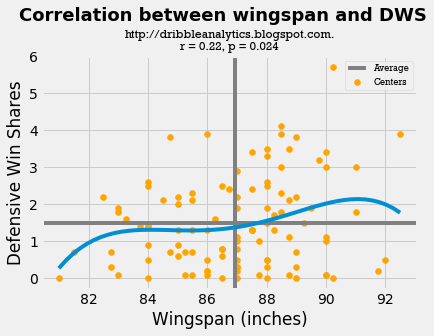

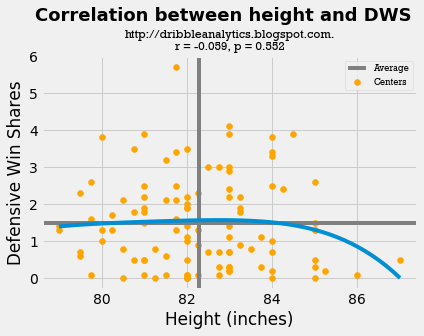

In [8]:
plt.style.use('fivethirtyeight')

wingspanPlotDWScenters, ax = plt.subplots()
heightPlotDWScenters, ax2 = plt.subplots()

ax.scatter(floatWingspan, floatDWS, label = 'Centers', color = 'orange')
ax.axvline(x = np.mean(floatWingspan), color = 'grey')
ax.axhline(y = np.mean(floatDWS), label = "Average", color = 'grey')
wingspanPlotDWScenters.suptitle("Correlation between wingspan and DWS", weight = 'bold', size = 18, y = 1.05)
ax.set_title("Created by Tal Boger, http://dribbleanalytics.blogspot.com.", size = 11, fontname = 'Rockwell')
ax.set_xlabel("Wingspan (inches)")
ax.set_ylabel("Defensive Win Shares")
 
z = np.polyfit(floatWingspan, floatDWS, 4)
f = np.poly1d(z)
 
x_new = np.linspace(min(floatWingspan), max(floatWingspan), 50)
y_new = f(x_new)
ax.plot(x_new, y_new)

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(floatWingspan, floatDWS)
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3))
 
ax.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')
 
ax2.scatter(floatHeight, floatDWS, label = 'Centers', color = 'orange')
ax2.axvline(x = np.mean(floatHeight), color = 'grey')
ax2.axhline(y = np.mean(floatDWS), label = "Average", color = 'grey')
heightPlotDWScenters.suptitle("Correlation between height and DWS", weight = 'bold', size = 18, y = 1.05)
ax2.set_title("Created by Tal Boger, http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax2.set_xlabel("Height (inches)")
ax2.set_ylabel("Defensive Win Shares")
 
z = np.polyfit(floatHeight, floatDWS, 4)
f = np.poly1d(z)

x_new = np.linspace(min(floatHeight), max(floatHeight), 50)
y_new = f(x_new)
ax2.plot(x_new, y_new)
 
ax2.legend(loc='best', prop={'size': 9, 'family': 'Rockwell'})
slope, intercept, r_value, p_value, std_err = linregress(floatHeight, floatDWS)
print("Height and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3))
 
ax2.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')
 
# Remove if you do not want to save the figures in your working directory
# Change the DPI to adjust image size
wingspanPlotDWScenters.savefig('wingspan-dws-exponential-centers.png', dpi = 400, bbox_inches = 'tight')
heightPlotDWScenters.savefig('height-dws-exponential-centers.png', dpi = 400, bbox_inches = 'tight')

# DRTG graphs with linear trendline

Wingspan and DRTG: slope = -0.10438266625671075 , intercept = 114.80068668583895 , r_value = -0.030677986418761835 , p_value = 0.8721501150842503 , std_err = 0.6427144400464527
Height and DRTG: slope = 0.8865079986311123 , intercept = 36.89464348304023 , r_value = 0.17263929385212762 , p_value = 0.3616207468924485 , std_err = 0.9558586150920254


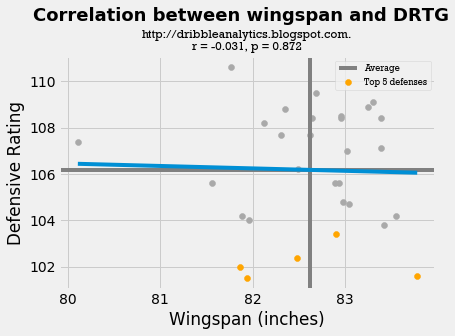

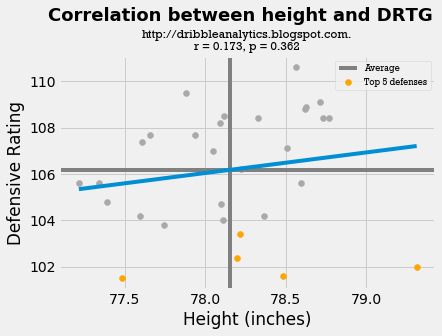

In [9]:
# Replace what is inside the quotes with wherever you placed the file
with open(r'C:\Users\tboge\OneDrive\dribble-analytics\wingspan-height-drtg\final-team-data.csv') as csvfile:
    readCSVteam = csv.reader(csvfile, delimiter = ',')
    next(readCSVteam)
    team = []
    wingspan = []
    height = []
    drtg = []
 
    for row in readCSVteam:
        currTeam = row[0]
        currWingspan = row[1]
        currHeight = row[2]
        currDRTG = row[3]
 
        team.append(currTeam)
        wingspan.append(currWingspan)
        height.append(currHeight)
        drtg.append(currDRTG)

floatWingspan = [float(i) for i in wingspan]
floatHeight = [float(i) for i in height]
floatDRTG = [float(i) for i in drtg]

plt.style.use('fivethirtyeight')
 
wingspanPlotDRTG, ax = plt.subplots()
heightPlotDRTG, ax2 = plt.subplots()

ax.scatter(floatWingspan[0:5], floatDRTG[0:5], label = "Top 5 defenses", color = 'orange')
ax.scatter(floatWingspan[5:], floatDRTG[5:], color = 'darkgray')
ax.axvline(x = np.mean(floatWingspan), color = 'grey')
ax.axhline(y = np.mean(floatDRTG), label = "Average", color = 'grey')
wingspanPlotDRTG.suptitle("Correlation between wingspan and DRTG", weight = 'bold', size = 18, y = 1.05)
ax.set_title("Created by Tal Boger, http://dribbleanalytics.blogspot.com.", size = 11, fontname = 'Rockwell')
ax.set_xlabel("Wingspan (inches)")
ax.set_ylabel("Defensive Rating")
 
ax.plot(np.unique(floatWingspan), np.poly1d(np.polyfit(floatWingspan, floatDRTG, 1))(np.unique(floatWingspan)))
 
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(floatWingspan, floatDRTG)
print("Wingspan and DRTG: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3))
 
ax.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')
 
ax2.scatter(floatHeight[0:5], floatDRTG[0:5], label = "Top 5 defenses", color = 'orange')
ax2.scatter(floatHeight[5:], floatDRTG[5:], color = 'darkgrey')
ax2.axvline(x = np.mean(floatHeight), color = 'grey')
ax2.axhline(y = np.mean(floatDRTG), label = "Average", color = 'grey')
heightPlotDRTG.suptitle("Correlation between height and DRTG", weight = 'bold', size = 18, y = 1.05)
ax2.set_title("Created by Tal Boger, http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax2.set_xlabel("Height (inches)")
ax2.set_ylabel("Defensive Rating")
 
 
ax2.plot(np.unique(floatHeight), np.poly1d(np.polyfit(floatHeight, floatDRTG, 1))(np.unique(floatHeight)))
 
ax2.legend(loc='best', prop={'size': 9, 'family': 'Rockwell'})

slope, intercept, r_value, p_value, std_err = linregress(floatHeight, floatDRTG)
print("Height and DRTG: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3))
 
ax2.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')
 
# Remove if you do not want to save the figures in your working directory
# Change the DPI to adjust image size
wingspanPlotDRTG.savefig('wingspan-drtg-linear.png', dpi = 400, bbox_inches = 'tight')
heightPlotDRTG.savefig('height-drtg-linear.png', dpi = 400, bbox_inches = 'tight')

# DRTG graphs with exponential trendline

Wingspan and DRTG: slope = -0.10438266625671075 , intercept = 114.80068668583895 , r_value = -0.030677986418761835 , p_value = 0.8721501150842503 , std_err = 0.6427144400464527
Height and DRTG: slope = 0.8865079986311123 , intercept = 36.89464348304023 , r_value = 0.17263929385212762 , p_value = 0.3616207468924485 , std_err = 0.9558586150920254


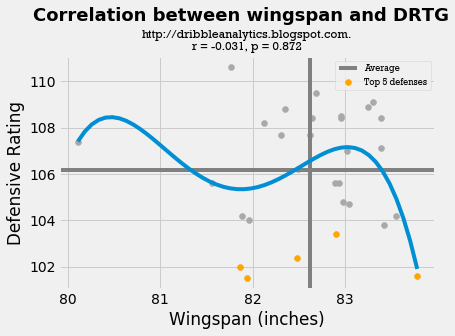

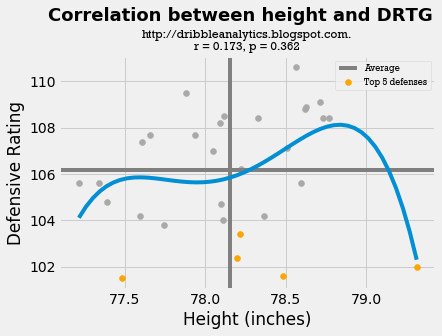

In [10]:
plt.style.use('fivethirtyeight')

wingspanPlotDRTG, ax = plt.subplots()
heightPlotDRTG, ax2 = plt.subplots()

ax.scatter(floatWingspan[0:5], floatDRTG[0:5], label = "Top 5 defenses", color = 'orange')
ax.scatter(floatWingspan[5:], floatDRTG[5:], color = 'darkgrey')
ax.axvline(x = np.mean(floatWingspan), color = 'grey')
ax.axhline(y = np.mean(floatDRTG), label = "Average", color = 'grey')
wingspanPlotDRTG.suptitle("Correlation between wingspan and DRTG", weight = 'bold', size = 18, y = 1.05)
ax.set_title("Created by Tal Boger, http://dribbleanalytics.blogspot.com.", size = 11, fontname = 'Rockwell')
ax.set_xlabel("Wingspan (inches)")
ax.set_ylabel("Defensive Rating")
 
z = np.polyfit(floatWingspan, floatDRTG, 4)
f = np.poly1d(z)
 
x_new = np.linspace(min(floatWingspan), max(floatWingspan), 50)
y_new = f(x_new)
ax.plot(x_new, y_new)
 
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(floatWingspan, floatDRTG)
print("Wingspan and DRTG: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3))
 
ax.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')
 
ax2.scatter(floatHeight[0:5], floatDRTG[0:5], label = "Top 5 defenses", color = 'orange')
ax2.scatter(floatHeight[5:], floatDRTG[5:], color = 'darkgrey')
ax2.axvline(x = np.mean(floatHeight), color = 'grey')
ax2.axhline(y = np.mean(floatDRTG), label = "Average", color = 'grey')
heightPlotDRTG.suptitle("Correlation between height and DRTG", weight = 'bold', size = 18, y = 1.05)
ax2.set_title("Created by Tal Boger, http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax2.set_xlabel("Height (inches)")
ax2.set_ylabel("Defensive Rating")
 
z = np.polyfit(floatHeight, floatDRTG, 4)
f = np.poly1d(z)

x_new = np.linspace(min(floatHeight), max(floatHeight), 50)
y_new = f(x_new)
ax2.plot(x_new, y_new)
 
ax2.legend(loc='best', prop={'size': 9, 'family': 'Rockwell'})

slope, intercept, r_value, p_value, std_err = linregress(floatHeight, floatDRTG)
print("Height and DRTG: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3))
 
ax2.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')
 
# Remove if you do not want to save the figures in your working directory
# Change the DPI to adjust image size
wingspanPlotDRTG.savefig('wingspan-drtg-exponential.png', dpi = 400, bbox_inches = 'tight')
heightPlotDRTG.savefig('height-drtg-exponential.png', dpi = 400, bbox_inches = 'tight')